375.0
['September', 'October', 'October', 'October', 'October', 'October', 'November', 'November', 'November', 'November', 'December', 'December', 'December', 'December', 'January', 'January', 'January', 'January', 'January', 'February', 'February', 'February', 'February', 'February']


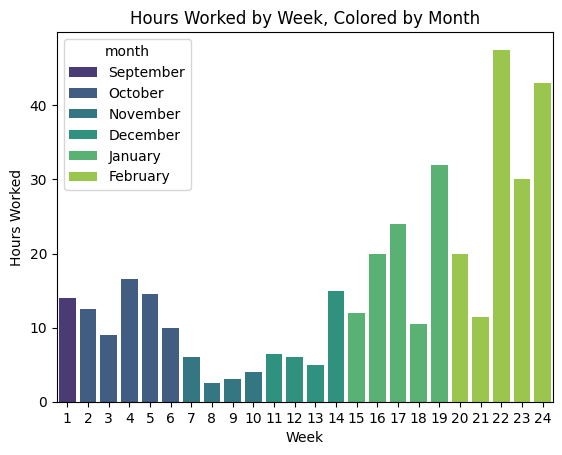

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import color_palette
import numpy as np
# Graph 1: Neel's working hours
# this plots my hours worked by month. was written by Bard!

weeks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
hours_worked = [14, 12.5, 9, 16.5, 14.5, 10, 6, 2.5, 3, 4, 6.5, 6, 5, 15, 12, 20, 24, 10.5, 32, 20, 11.5, 47.5, 30, 43]
#months = [9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11]
print(f"{np.sum(hours_worked)}")
months = ["September"]
for i in range(5):
    months.append("October")
for i in range(4):
    months.append("November")
for i in range(4):
    months.append("December")
for i in range(5):
    months.append("January")
for i in range(5):
    months.append("February")

print(months)
# Create a dataframe from the data
df = pd.DataFrame({"week": weeks, "hours_worked": hours_worked, "month": months})
# Specify a logical color palette
palette = color_palette("viridis", len(df["month"].unique()))
# Create the bar chart
sns.barplot(x="week", y="hours_worked", hue="month", data=df, palette=palette)
plt.xlabel("Week")
plt.ylabel("Hours Worked")
plt.title("Hours Worked by Week, Colored by Month")
# Show the chart
plt.show()

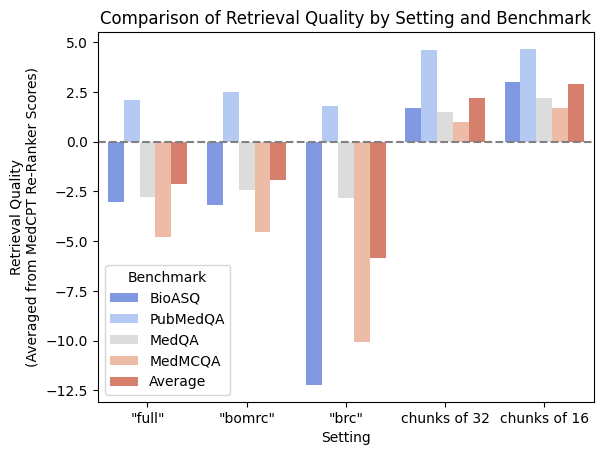

In [2]:
# Graph 2: Average retrieval quality on different retrieval settings (with all benchmarks)
#this plots the average retrieval quality of full, bomrc, brc, input_segmentation_32, input_segmentation_16
#data in this was collected on 09.01.24 by calling all 486 questions in BioASQ5b, and 500 questions in MedQA.
#for each of them, top 5 were retrieved and reranked with the MedCPT Re-Ranker. the top chunk and its score were noted
#at the end, the average of these scores was noted as "average retrieval quality"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mode = ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"]

# Define the dataframes
data1 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-3.0362098, -3.1872854, -12.228864, 1.7101222, 3.02405],
        'Benchmark': ["BioASQ"] * 5}
df1 = pd.DataFrame(data1)

data2 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [2.1173124, 2.4807162, 1.7723576, 4.6062207, 4.6623235],
        'Benchmark': ["PubMedQA"] * 5}
df2 = pd.DataFrame(data2)

data3 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-2.7683034,-2.4228208,-2.8325806,1.5045198, 2.1952846],
        'Benchmark': ["MedQA"] * 5}
df3 = pd.DataFrame(data3)

data4 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-4.8010774,-4.523125, -10.081551, 1.0107652, 1.6785029],
        'Benchmark': ["MedMCQA"] * 5}
df4 = pd.DataFrame(data4)

# Combine the DataFrames
df = pd.concat([df1, df2, df3, df4])

# Calculate average retrieval quality per setting
avg_df = df.groupby('Setting')['Avg. retrieval quality'].mean().reset_index()

# Add a generic "Benchmark" column
avg_df['Benchmark'] = 'Average'

df = pd.concat([df, avg_df])

# Create a diverging color palette for positive and negative values
palette = sns.color_palette("coolwarm", n_colors=len(df['Benchmark'].unique()))

# Create the bar plot with Seaborn
sns.barplot(x="Setting", y="Avg. retrieval quality", hue="Benchmark", palette=palette, data=df)


# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a title and labels
plt.title("Comparison of Retrieval Quality by Setting and Benchmark")
plt.xlabel("Setting")
plt.ylabel("Retrieval Quality\n(Averaged from MedCPT Re-Ranker Scores)")

# Add a horizontal line at zero for visual clarity
plt.axhline(0, color='gray', linestyle='--')

# Show the plot
plt.show()

{'1975': 249054, '1976': 255302, '1977': 262345, '1978': 272331, '1979': 282247, '1992': 418081, '1991': 413329, '1990': 410751, '1993': 426839, '1985': 335427, '1986': 349775, '1987': 367876, '1988': 386980, '1989': 402988, '1970': 219451, '1969': 215430, '1968': 208181, '1967': 191976, '1971': 223535, '1964': 162083, '1966': 180109, '1972': 227999, '1973': 231167, '1974': 235168, '1965': 176841, '1963': 141563, '1962': 125700, '1961': 120177, '1960': 112224, '1984': 318317, '1982': 295855, '1983': 309479, '1981': 283457, '1980': 280824, '1995': 449058, '1994': 438106, '1996': 458920, '1997': 398348, '2002': 605844, '1998': 437071, '2000': 499154, '1999': 456720, '2001': 541527, '2004': 631378, '2003': 610613, '1956': 107017, '1953': 108817, '1954': 106079, '1950': 85787, '1958': 109468, '1944': 4791, '1938': 5874, '1959': 109970, '1928': 5579, '1951': 103886, '1949': 62816, '1935': 5769, '1937': 5428, '1955': 108389, '1902': 4739, '1925': 5093, '1946': 53911, '1957': 111533, '1942': 

/tmp/ipykernel_820666/901432829.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Total", data=df, palette=palette)


Average number of tokens per paper: 241.14119494072503
Number of papers to get to 2 billion tokens: 8293896.032536541


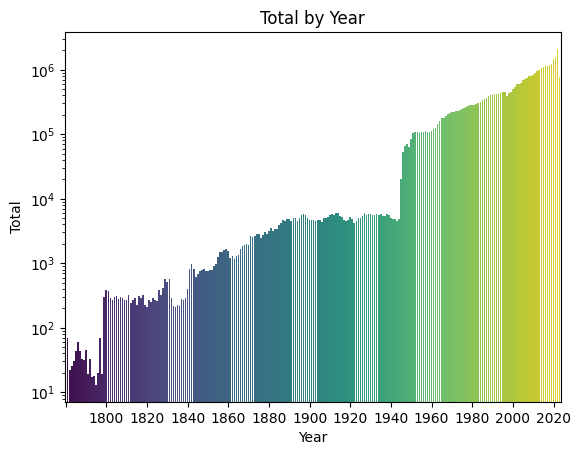

In [24]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from seaborn import color_palette
# load total_year_dict.json
with open('vectorstores/pma_years/total_year_dict.json') as f:
    data = json.load(f)
# turn into dataframe and print
# df = pd.DataFrame(data, index=range(len(data)))
# print(df.head())
print(data)
#turn into dataframe where one column is keys and the other is values
#sort dataframe by Year here:
df = df.sort_values(by=['Year'])
#print total number of papers
total_num_papers = np.sum(df['Total'])
print(f"Total number of papers: {total_num_papers}")
# print(df.head())
# Create a color palette
palette = color_palette("viridis", len(df["Year"].unique()))
# Create the bar chart
sns.barplot(x="Year", y="Total", data=df, palette=palette)
# make y range logarithmic:
plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Total")
plt.title("Total by Year")
# make x-axis labels less frequent:
plt.xticks(np.arange(0, len(df["Year"].unique()), 20))


global_num_tokens = 8809702185
avg_tokens_per_paper = global_num_tokens / total_num_papers
print(f"Average number of tokens per paper: {avg_tokens_per_paper}")
#num papers to get to 2 billion tokens
num_papers_to_2b = 2000000000 / avg_tokens_per_paper
print(f"Number of papers to get to 2 billion tokens: {num_papers_to_2b}")

8 293 896

# Show the chart
plt.show()

/tmp/ipykernel_480495/3454865958.py:25: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)


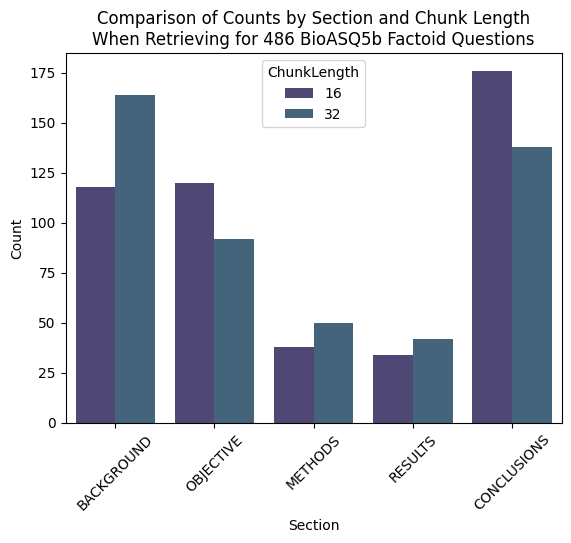

In [4]:
# Graph 3: Where do we retrieve from when considering bioASQ questions?
# this plots the distribution of chunks over sections on BioASQ5b chunk_length=16 and 32
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframes
data1 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [164, 92, 50, 42, 138],
        'ChunkLength': [32] * 5}
df1 = pd.DataFrame(data1)

data2 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [118, 120, 38, 34, 176],
        'ChunkLength': [16] * 5}
df2 = pd.DataFrame(data2)

# Combine the DataFrames
df = pd.concat([df1, df2])

# Create a custom color palette with adjusted saturation
palette = sns.color_palette("viridis", n_colors=5, desat=0.8)  # Adjust desat as needed

# Create the bar plot with Seaborn
sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title("Comparison of Counts by Section and Chunk Length\nWhen Retrieving for 486 BioASQ5b Factoid Questions")
plt.xlabel("Section")
plt.ylabel("Count")

# Show the plot
plt.show()

/tmp/ipykernel_480495/724374695.py:24: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)


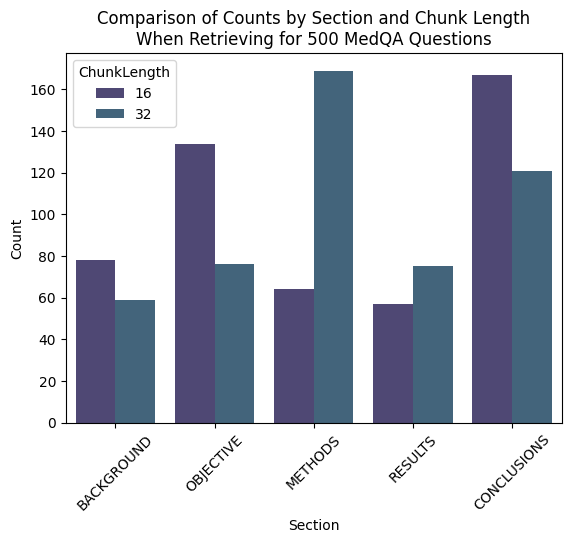

In [5]:
# Graph 4: Where do we retrieve from when considering MedQA questions?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframes
data1 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [59, 76, 169, 75, 121],
        'ChunkLength': [32] * 5}
df1 = pd.DataFrame(data1)

data2 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [78, 134, 64, 57, 167],
        'ChunkLength': [16] * 5}
df2 = pd.DataFrame(data2)

# Combine the DataFrames
df = pd.concat([df1, df2])

# Create a custom color palette with adjusted saturation
palette = sns.color_palette("viridis", n_colors=5, desat=0.8)  # Adjust desat as needed

# Create the bar plot with Seaborn
sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title("Comparison of Counts by Section and Chunk Length\nWhen Retrieving for 500 MedQA Questions")
plt.xlabel("Section")
plt.ylabel("Count")

# Show the plot
plt.show()

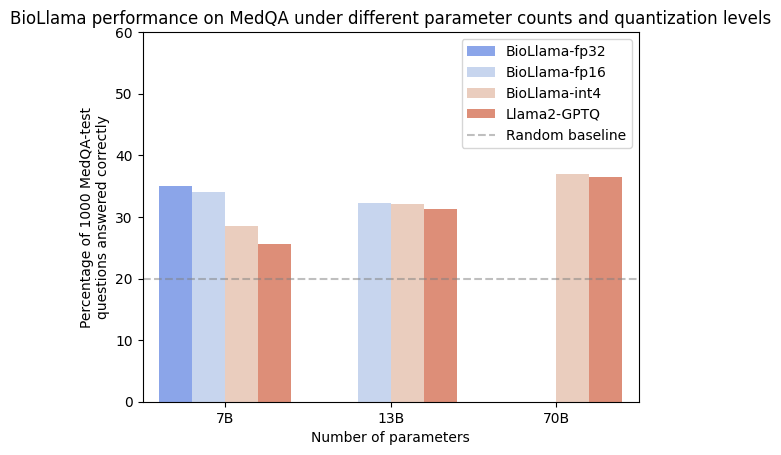

In [8]:
# Graph 2: Average retrieval quality on different retrieval settings (with all benchmarks)
#this plots the average retrieval quality of full, bomrc, brc, input_segmentation_32, input_segmentation_16
#data in this was collected on 09.01.24 by calling all 486 questions in BioASQ5b, and 500 questions in MedQA.
#for each of them, top 5 were retrieved and reranked with the MedCPT Re-Ranker. the top chunk and its score were noted
#at the end, the average of these scores was noted as "average retrieval quality"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mode = ["7B", "13B", "70B"]

# Define the dataframes
data1 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [35, 0, 0],
        'Benchmark': ["BioLlama-fp32"] * 3}
df1 = pd.DataFrame(data1)

data2 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [34, 32.2, 0],
        'Benchmark': ["BioLlama-fp16"] * 3}
df2 = pd.DataFrame(data2)

data3 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [28.5, 32.1, 37],
        'Benchmark': ["BioLlama-int4"] * 3}
df3 = pd.DataFrame(data3)

data4 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [25.6, 31.3, 36.4],
        'Benchmark': ["Llama2-GPTQ"] * 3}
df4 = pd.DataFrame(data4)


# Combine the DataFrames
df = pd.concat([df1, df2, df3, df4])

# Create a diverging color palette for positive and negative values
palette = sns.color_palette("coolwarm", n_colors=len(df['Benchmark'].unique()))

# Create the bar plot with Seaborn
sns.barplot(x="Parameter count", y="MedQA Performance", hue="Benchmark", palette=palette, data=df)

#set the y max to be 60
plt.ylim(0, 60)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add a title and labels
plt.title("BioLlama performance on MedQA under different parameter counts and quantization levels")
plt.xlabel("Number of parameters")
plt.ylabel("Percentage of 1000 MedQA-test\nquestions answered correctly")

#add a horizontal, dashed red line for y=20, with half opacity. add to the legend a label for it
plt.axhline(20, color='gray', linestyle='--', alpha=0.5, label='Random baseline')
plt.legend()

# Show the plot
plt.show()